<a href="https://colab.research.google.com/github/Egret035/-win11-/blob/main/Egret_Group_WOA7015_FinalReport_HeartDiseasePredictionUsingDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv('Heart_Disease_Prediction.csv')

In [2]:
df.info()
df.describe()
print(df.isnull().sum())
# check out duplicate rows
duplicate_rows = df[df.duplicated()]
# Split features and target values
X= df.iloc[:, :-1]
y= df.iloc[:, -1]
# Fit and transform the target column
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [3]:
print(duplicate_rows)
print(X.head())
print(y.head())
print(y_encoded)
# Print the type of the encoded array
print(type(y_encoded))  # Should be <class 'numpy.ndarray'>
print(y_encoded.dtype)  # Should be int

Empty DataFrame
Columns: [Age, Sex, Chest pain type, BP, Cholesterol, FBS over 120, EKG results, Max HR, Exercise angina, ST depression, Slope of ST, Number of vessels fluro, Thallium, Heart Disease]
Index: []
   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1           

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.25, random_state = 9)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_normal', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(units=32, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(units=16, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(units=8, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
print(type(y_train))  # Check if it's a numpy array
print(y_train.dtype)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)
history=ann.fit(X_train, y_train, batch_size = 40, epochs = 200, validation_split=0.2, callbacks=[early_stopping])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<class 'numpy.ndarray'>
int64
Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.4996 - loss: 1.0697 - val_accuracy: 0.4878 - val_loss: 1.1241
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4799 - loss: 1.0799 - val_accuracy: 0.4878 - val_loss: 1.0300
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4778 - loss: 0.9711 - val_accuracy: 0.4878 - val_loss: 0.9498
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5177 - loss: 0.8741 - val_accuracy: 0.5122 - val_loss: 0.8962
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5059 - loss: 0.8910 - val_accuracy: 0.5122 - val_loss: 0.8460
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5465 - loss: 0.8886 - val_accuracy: 0.5122 - val_loss: 0.8125
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5329 - loss: 0.9991 - val_accuracy: 0.5122 - val_loss: 0.7884
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4862 - loss: 0.8671 - va

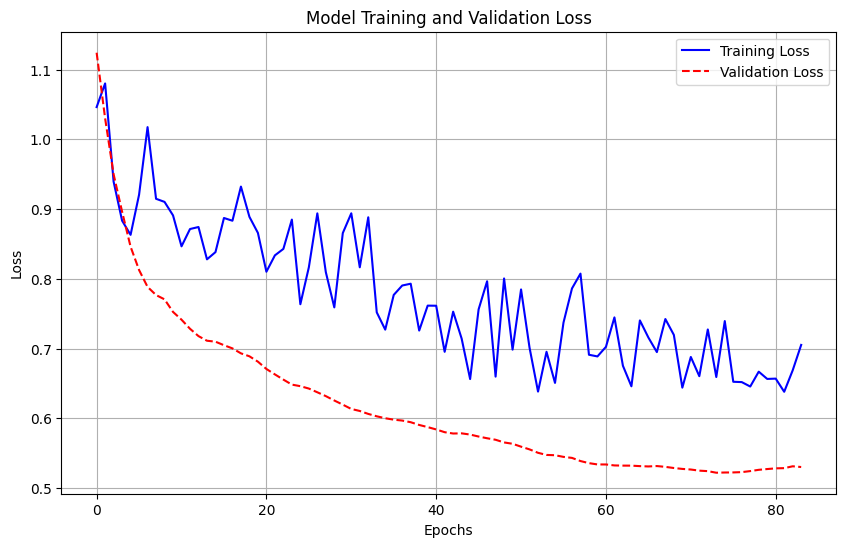

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
[[0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]
[[40  3]
 [ 8 17]]
Accuracy: 83.82%


In [6]:
# Extract loss values from the history
loss = history.history['loss']
import matplotlib.pyplot as plt

# Extract loss values from the history
loss = history.history['loss']
val_loss = history.history['val_loss']  # Validation loss for early stopping

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red', linestyle='--')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


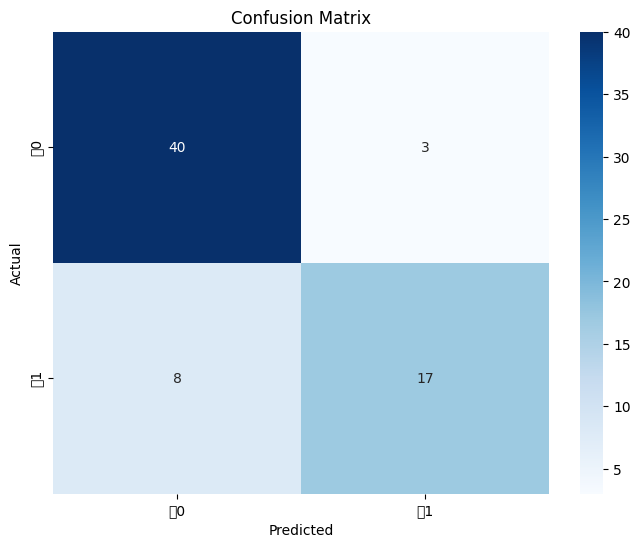

In [8]:
import seaborn as sns
plt.figure(figsize=(8, 6))  # 设置画布大小
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['类0', '类1'], yticklabels=['类0', '类1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()